In [1]:
import numpy as np
import pandas as pd
import random as rd
import string as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### test dataset1 ####
# n = 100 # row num
# subject_ID = [''.join(np.random.choice(list('abcdefghjiklop1234'), size = 8)) for _ in range(n)]
# memory = pd.Series(np.random.randint(1, 51, size = n)).astype('int64')
# language = np.random.randint(1, 101, size = n)
# test = [''.join(np.random.choice(list('abcdefghijklm'), size = 4)) for x in range(n)]

# #add missing data on memory column
# missing_pct = 0.1 #propotion of data to be missing
# n_missing = int(n * missing_pct)
# missing_idx = np.random.choice(np.arange(n), size = n_missing,
#                                replace = False)
# memory[missing_idx] = np.nan

# df= pd.DataFrame({'subject_ID': subject_ID,
#                  'Memory': memory,
#                  'Language': language,
#                  'test': test})

#### test dataset2 ####
# df = {'name':['hello','djksl','asdf','qwert','werss','fdsdf','fdsgbb','fdsvds','vcxcvcxv'],
#         'age' :[45,30,23,47,55,16,23,22,13],
#         'gender':['F', '','F','F','F','F','','M','M'],
#         'memory':[30,40,35,36,43,33,50,60,200000],
#         'score':[np.nan, 5, 5, 90550, 5, 5, 5, 5, 7]}
# df = pd.DataFrame(df)



df = pd.read_csv("merged_vol_hand_npt.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'merged_vol_hand_npt.csv'

In [6]:
# Sanity check
#print(type(df))
#missing_data = df.isna().any(axis=1)
#print(f"index: {df.index[missing_data]}")




print(type(df))
print('df.dtypes:', df.dtypes)
integer_columns = df.select_dtypes(include='int').columns
print('integer_columns:', integer_columns)
df[integer_columns] = df[integer_columns].astype(str)
missing_data = df.isna().any(axis=1)
print(f"index: {df.index[missing_data]}")

<class 'pandas.core.frame.DataFrame'>
df.dtypes: Unnamed: 0           object
Unnamed: 1           object
Study_ID             object
Age                 float64
Edu                  object
                     ...   
CC_Mid_Posterior    float64
CC_Central          float64
CC_Mid_Anterior     float64
CC_Anterior         float64
Handedness          float64
Length: 414, dtype: object
integer_columns: Index([], dtype='object')
index: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       421, 422, 423, 424, 425, 426, 427, 428, 429, 430],
      dtype='int64', length=431)


In [12]:
# Remove Outlier Function
def removeOutliers(df):
    #0 Filter out non-numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    exclude_cols = [col for col in df.columns if col not in numeric_cols] 
    df = df.drop(columns = exclude_cols) #exclude non-numeric & Age
    
    #1. Treat missing data 
    df = df.replace('NA', np.nan)
    df.fillna(df.mean(), inplace = True) #opt1: drop NAs and replace NAs with the means of their column
    # dr.dropna() #opt2: drop the entire row where an NA is included
    
    #2. Get the mean & std of each colum
    col_means = df.mean() 
    col_stds = df.std()
    for col, mean in col_means.iteritems():
        print(f"{col} mean : {mean:.3f}")
    for col, std in col_stds.iteritems():
        print(f"{col} std: {std:.3f}")
        
    #3.Get rid of outliers (3  stds above and below the mean)
    clean_df = df[(np.abs(df.sub(col_means, axis = 1)) <= 3 * col_stds).all(axis = 1)]
    
    #3-1. Get the index and values of the filtered rows
    clean_df_index = clean_df.index
    clean_df_values = clean_df.values
    print(clean_df_index)
    print(clean_df_values)
    print(clean_df)
    
    
    return clean_df

In [13]:
removeOutliers(df)

Age mean : 70.658
TOPF_Actual_SS mean : 103.447
TOPF_Pred_SS mean : 108.857
WRAT4_Read_SS mean : 93.250
MMSE_Tot mean : nan
MoCA_MIS mean : nan
WAIS4_Sim_raw mean : 23.558
WAIS4_Sim_ss mean : 10.162
WAIS4_BD_raw mean : 30.045
WAIS4_BD_ss mean : 9.560
WAIS4_MR_raw mean : 13.382
WAIS4_MR_ss mean : 10.398
WAIS4_DS_raw mean : 23.219
WAIS4_DS_ss mean : 9.142
WAIS4_Coding_raw mean : 46.225
WAIS4_Coding_ss mean : 9.045
WAIS4_DSfwd_raw mean : 9.220
WAIS4_DSfwd_span mean : 9.352
WAIS4_DSbwd_raw mean : 7.529
WAIS4_DSbwd_span mean : 9.457
WAIS4_Dsseq_raw mean : 6.462
WAIS4_Dsseq_span mean : 8.876
WAIS4_Symb_raw mean : 24.778
WAIS4_Symb_ss mean : 8.556
WAIS4_Voc_raw mean : 41.717
WAIS4_Voc_ss mean : 11.283
WAIS4_Arith_raw mean : 12.714
WAIS4_Arith_ss mean : 9.143
WAIS4_VP_raw mean : 9.667
WAIS4_VP_ss mean : 8.000
WAIS4_Info_raw mean : 15.429
WAIS4_Info_ss mean : 10.571
WAIS4_FSIQ mean : nan
WAIS4_VCI mean : nan
WAIS4_PRI mean : nan
WAIS4_WMI mean : nan
WAIS4_PSI mean : nan
WMS4adult_LMI_ss mean : 

Int64Index([], dtype='int64')
[]
Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 1, Study_ID, Age, Edu, NPT_date, TOPF_raw, TOPF_Actual_SS, TOPF_Pred_SS, WTAR_raw, WTAR_SS, eFSIQ, WRAT4_Read_raw, WRAT4_Read_SS, MMSE_Tot, MoCA_Tot, MoCA_MIS, WAIS4_Sim_raw, WAIS4_Sim_ss, WAIS4_BD_raw, WAIS4_BD_ss, WAIS4_MR_raw, WAIS4_MR_ss, WAIS4_DS_raw, WAIS4_DS_ss, WAIS4_Coding_raw, WAIS4_Coding_ss, WAIS4_DSfwd_raw, WAIS4_DSfwd_span, WAIS4_DSbwd_raw, WAIS4_DSbwd_span, WAIS4_Dsseq_raw, WAIS4_Dsseq_span, WAIS4_Symb_raw, WAIS4_Symb_ss, WAIS4_Voc_raw, WAIS4_Voc_ss, WAIS4_Arith_raw, WAIS4_Arith_ss, WAIS4_VP_raw, WAIS4_VP_ss, WAIS4_Info_raw, WAIS4_Info_ss, WAIS4_FSIQ, WAIS4_VCI, WAIS4_PRI, WAIS4_WMI, WAIS4_PSI, WMS4adult_LMI_raw, WMS4adult_LMI_ss, WMS4adult_LMII_raw, WMS4adult_LMII_ss, WMS4adult_VRI_raw, WMS4adult_VRI_ss, WMS4adult_VRII_raw, WMS4adult_VRII_ss, WMS4adult_LMIIrecog_raw, WMS4adult_LMIIrecog_percent, WMS4adult_VRIIrecog_raw, WMS4adult_VRIIrecog_percent, WMS4adult_VRIIcopy_raw, WMS4adult_VRIIcopy_

,Unnamed: 0,Unnamed: 1,Study_ID,Age,Edu,NPT_date,TOPF_raw,TOPF_Actual_SS,TOPF_Pred_SS,WTAR_raw,...,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,Handedness


In [15]:
def distributionGraph(df):
    for col in df.columns:
        plt.figure(figsize=(8,6))
        plt.hist(df[col], bins = 20)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

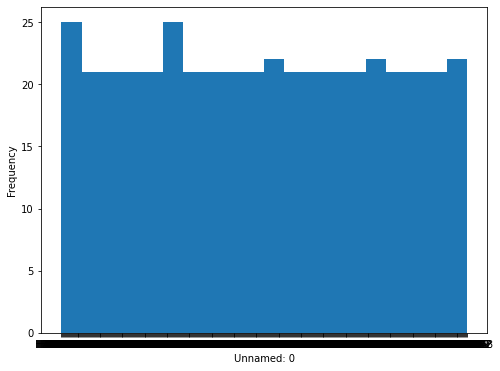

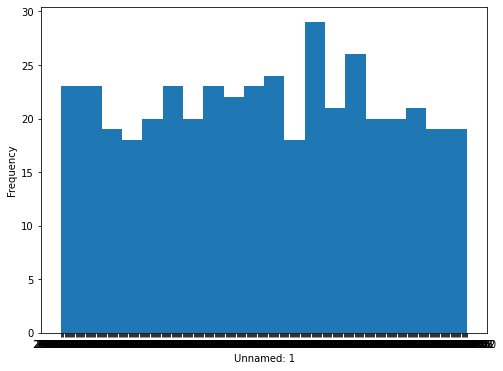

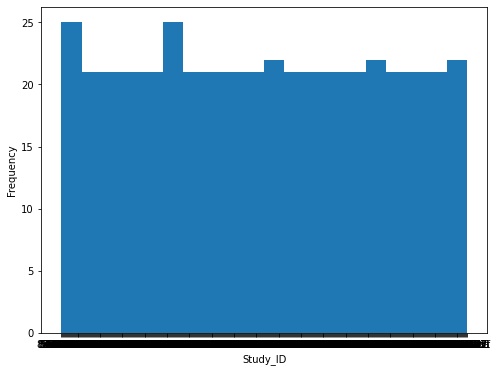

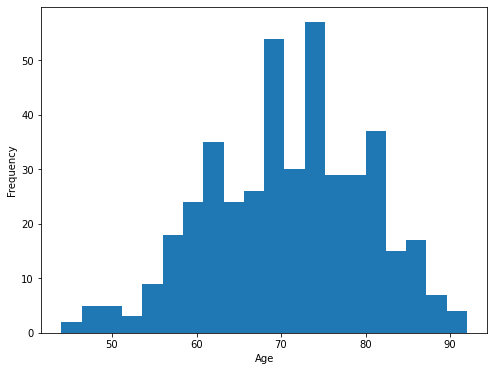

TypeError: 'value' must be an instance of str or bytes, not a float

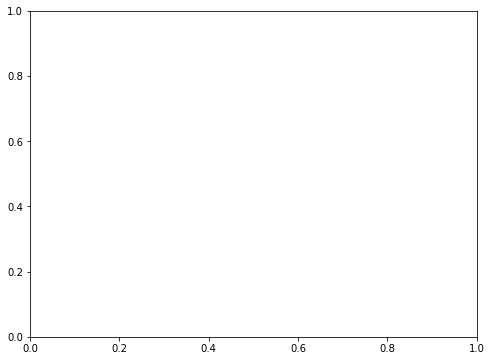

In [16]:
distributionGraph(df)